# Select Cards

## Import dependencies

In [1]:
import pandas as pd
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Load dataset

In [2]:
df = pd.read_csv("data/cards.csv", index_col=0)
df

,xref_id,tag,year,desc
0,@I1@,BIRT,1819,"Victoria /Hanover/ is born in Kensington,Pala..."
1,@I2@,BIRT,1819,Albert Augustus Charles// is born in Schloss R...
2,@I3@,BIRT,1840,Victoria Adelaide Mary// is born in Buckingham...
3,@I4@,BIRT,1841,"Edward_VII /Wettin/ is born in Buckingham,Pal..."
4,@I5@,BIRT,1843,"Alice Maud Mary// is born in Buckingham,Palace..."
...,...,...,...,...
196,@F647@,MARR,1850,Frederick_VII // and Louise /Rasmussen/ marr...
197,@F662@,MARR,1836,Otto_I Friedrich Ludwig/Wittelsbach/ and Amali...
198,@F663@,MARR,1832,Leopold_I George of_Saxe-Coburg// and Louise M...
199,@F1295@,MARR,1932,Lennart Gustaf Nicholas// and Karin Emma Louis...


In [3]:
graph_features = pd.read_csv("data/graph_features.csv", index_col=0)
graph_features

,0,1,2,3
@I1@,0.577792,-0.360320,1.154970,-1.928660
@F42@,0.603071,-0.497670,0.963891,-1.813704
@F1@,0.624987,-0.633886,0.765493,-1.663857
@I2@,0.638989,-0.765938,0.561206,-1.449884
@F43@,0.635261,-0.885267,0.365468,-1.141019
...,...,...,...,...
@I3006@,-0.272970,-1.003930,-1.210368,0.002895
@I3007@,-0.330811,-0.918126,-1.364303,0.332938
@I3008@,-0.329129,-0.912464,-1.351566,0.359515
@I3009@,-0.599596,0.720528,0.369262,0.088158


## Combine features

In [4]:
df = df.join(graph_features, on="xref_id")

## Clustering

In [5]:
pipeline = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=50, n_init="auto"),
)

features = ["tag", "year"] + list(map(str, range(graph_features.shape[1])))

df["label"] = pipeline.fit_predict(pd.get_dummies(df[features]))

selected = df.groupby("label").first().sort_values("year")

with pd.option_context("max_colwidth", None):
    display(selected[["tag", "year", "desc"]])

,tag,year,desc
label,,,
23,BIRT,742,"Charlemagne // is born in Aachen,West Germany"
14,MARR,1170,Alfonso_VIII // and Eleanor // marry in Burgos
9,DEAT,1238,"Joan // dies in Near London,England"
18,DEAT,1265,Simon /de_Montfort/ dies in Evesham
4,BIRT,1284,"Edward_II // is born in Caernarvon,Castle,Wales"
26,BIRT,1286,Beatrice // is born in Aquitaine
2,BIRT,1292,Isabella of_France // is born in Paris
38,MARR,1308,Edward_II // and Isabella of_France // marry in Bolongne
40,DEAT,1327,"Edward_II // dies in Berkeley Castle,Gloucestershire"


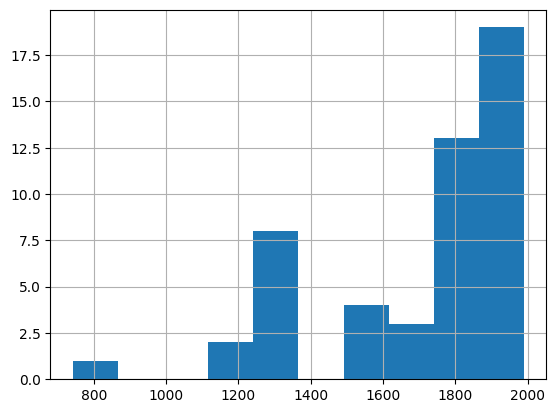

In [6]:
selected.year.hist();